In [1]:
#Tässä notebookissa tehdään kolme erilaista visualisointia esimerkkidatasta ja säädetään niiden ulkonäköä. 
#Aloitetaan lataamalla Excel-tiedosto Juliaan. Muista asentaa StatsPlots-paketti.

#Piirretään ensin pylväskaavio. ladataan oikean laskentataulukon tiedot dataframeen. Argumentti infer_eltypesin avulla
#yritetään päätellä sarakkeiden tietotyypit automaattisesti. 

using Printf, StatsPlots, DataFrames, XLSX

df = DataFrame(XLSX.readtable("C:\\Users\\Installer\\Desktop\\dao_visualisoinnit.xlsx", "Pylvas", infer_eltypes=true))



Row,Toimipaikka,Neljännes,Myynti (1000 €)
,String,Int64,Int64
1,A,1,10242
2,B,1,14801
3,C,1,11262
4,D,1,19017
5,A,2,15638
6,B,2,12079
7,C,2,16472
8,D,2,11936
9,A,3,12635


In [2]:
#Piirretään seuraavaksi kaavio, jossa esitetään toimipaikoittain neljännesten yhteismyynti. 

#Julia ei hyväksy komennoissa välilyöntejä sarakkeiden nimissä, joten nimetään sarake uudelleen. 
#Huomaa, että myös erikoismerkit voivat tuottaa ongelmia. 

rename!(df, "Myynti (1000 €)" => :Myynti)

#Tehdään uusi dataframe, jossa summataan toimipaikkojen myynnit. 
df_sum = combine(groupby(df, :Toimipaikka), :Myynti => sum => :MyyntiYht)


Row,Toimipaikka,MyyntiYht
,String,Int64
1,A,50046
2,B,57309
3,C,65023
4,D,53180


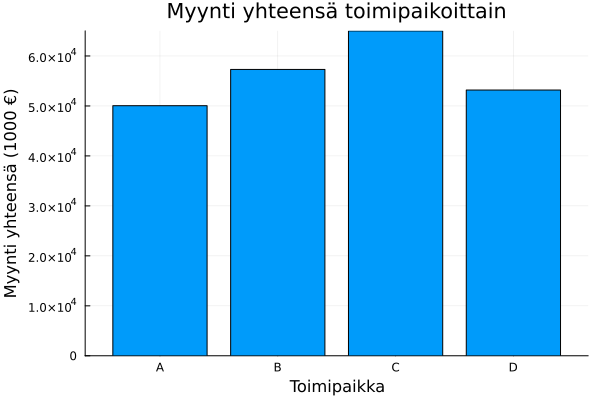

In [3]:
#Piirretään seuraavaksi haluttu kaavio. 
#Merkintä @df (makro) kertoo Julialle, että kaikki komennossa tarvittava data löytyy seuraavaksi 
#annettavasta dataframesta. 

@df df_sum bar(:Toimipaikka, :MyyntiYht,
    legend=false, xlabel="Toimipaikka", ylabel="Myynti yhteensä (1000 €)",
    title="Myynti yhteensä toimipaikoittain")

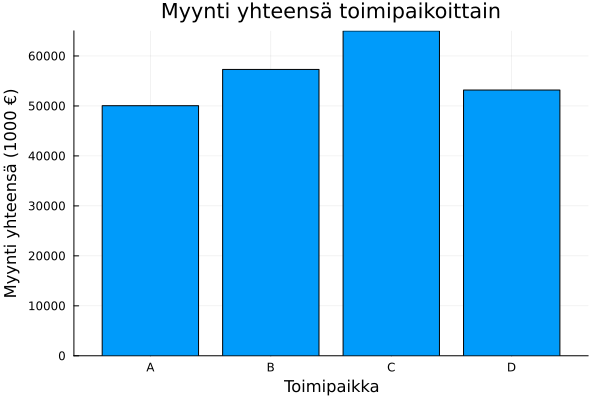

In [4]:
#Estetään y-akselin tieteellinen notaatio. 

@df df_sum bar(:Toimipaikka, :MyyntiYht,
    legend=false,
    xlabel="Toimipaikka",
    ylabel="Myynti yhteensä (1000 €)",
    title="Myynti yhteensä toimipaikoittain",
    yformatter = x -> @sprintf("%d", Int(round(x)))  # ei tieteellistä muotoa
)


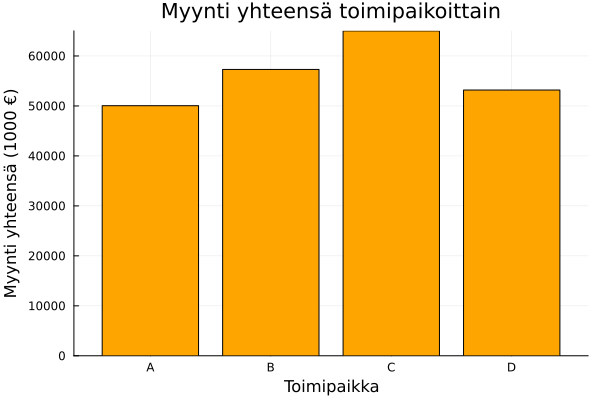

In [5]:
#Vaihdetaan seuraavaksi pylväiden väriksi oranssi. 

@df df_sum bar(:Toimipaikka, :MyyntiYht,
    legend=false,
    color = :orange,
    xlabel="Toimipaikka",
    ylabel="Myynti yhteensä (1000 €)",
    title="Myynti yhteensä toimipaikoittain",
    yformatter = x -> @sprintf("%d", Int(round(x)))  # ei tieteellistä muotoa
)

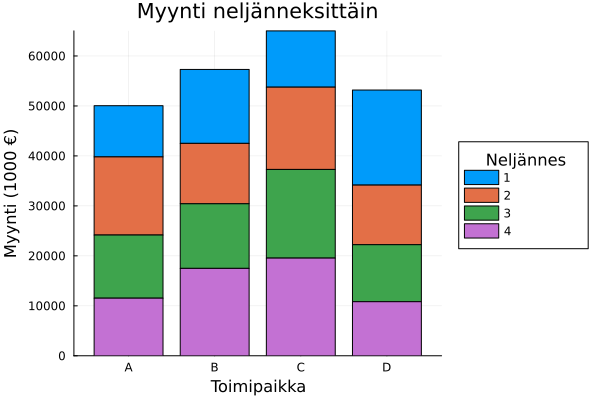

In [6]:
#Piirretään seuraavaksi pinottu pylväskaavio, jossa vuoden kokonaismyynti on eroteltu neljänneksittäin.Tämä tapahtuu
#argumentilla color, joka voi saada arvokseen joko värin nimen tai sitten koodin joka rgb:nä tai heksana. 

@df df groupedbar(:Toimipaikka, :Myynti,
    group = :Neljännes,
    bar_position = :stack,
    legend = :outerright,
    legendtitle= "Neljännes",
    xlabel = "Toimipaikka", ylabel = "Myynti (1000 €)",
    title = "Myynti neljänneksittäin",
    yformatter = x -> @sprintf("%d", Int(round(x)))
)


In [7]:
#Katsotaan seuraavaksi viivakaavion piirtämistä. Ladataan data taulukosta viiva. 

df2 = DataFrame(XLSX.readtable("C:\\Users\\Installer\\Desktop\\dao_visualisoinnit.xlsx", "Viiva", infer_eltypes=true))

Row,Vuosi,Indeksi
,Int64,Float64
1,2000,105.5
2,2001,106.7
3,2002,108.9
4,2003,115.3
5,2004,111.3
6,2005,119.8
7,2006,130.8
8,2007,111.2
9,2008,120.0


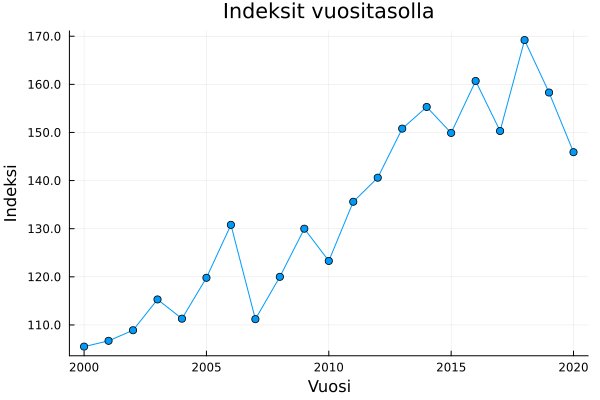

In [8]:
#Piirretään viivakaavio

@df df2 plot(:Vuosi, :Indeksi,
    seriestype = :line,
    marker = :circle,        
    legend = false,
    xlabel = "Vuosi",
    ylabel = "Indeksi",
    title  = "Indeksit vuositasolla",
    yformatter = x -> @sprintf("%.1f", x)
)

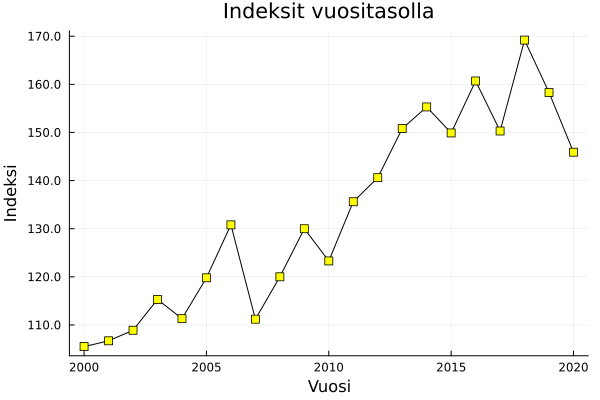

In [9]:
#Muutetaan viiva mustaksi ja pisteet keltaiseksi ja samalla markkeriksi neliö. 

@df df2 plot(:Vuosi, :Indeksi,
    seriestype = :line,
    marker = :square,   
    linecolor = :black,
    markercolor = :yellow,
    legend = false,
    xlabel = "Vuosi",
    ylabel = "Indeksi",
    title  = "Indeksit vuositasolla",
    yformatter = x -> @sprintf("%.1f", x)
)



In [10]:
#Piirretään viimeiseksi hajontakaavio. 

df3 = DataFrame(XLSX.readtable("C:\\Users\\Installer\\Desktop\\dao_visualisoinnit.xlsx", "Hajonta", infer_eltypes=true))

#Tutkitaan sarakkeiden otsikot.

names(df3)

2-element Vector{String}:
 "Markkinointiin käytetty raha (1 000 €)"
 "Tulos(1 000 €)"

In [11]:
#Huomataan, että siellä on välilyöntejä ja erikoismerkkejä. Nimetään uudelleen.
#Huomaa, että toisessa otsikossa on välilyönti ennen ensimmäistä sulkua ja toisessa ei. 
#Tämä on hyvin yleistä. Myös turha välilyönti otsikon lopussa on yleistä. 

rename!(df3, "Markkinointiin käytetty raha (1 000 €)" => :Markkinointi)
rename!(df3, "Tulos(1 000 €)" => :Tulos)



Row,Markkinointi,Tulos
,Int64,Int64
1,50,100
2,30,50
3,49,45
4,89,123
5,30,80
6,45,90
7,66,180
8,70,125


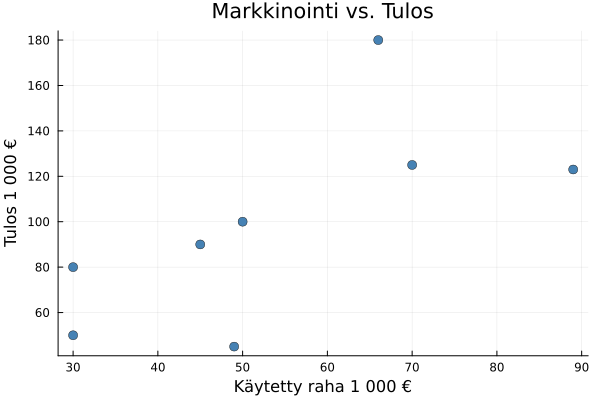

In [12]:
@df df3 scatter(:Markkinointi, :Tulos,
    xlabel = "Käytetty raha 1 000 €",
    ylabel = "Tulos 1 000 €",
    title  = "Markkinointi vs. Tulos",
    legend = false,
    markercolor = :steelblue,
    markersize = 5,
    markerstrokewidth = 0.5
)